Data API is [here](https://www.hikingproject.com/data).

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Hiking Project

In [72]:
trail_df_two = pd.read_csv('hiking_two.csv')

In [73]:
trail_df = pd.read_csv('hiking.csv')

In [74]:
trail_df = trail_df.append(trail_df_two, ignore_index=True)

In [77]:
trail_df.head()

,id,name,summary,difficulty,stars,star_votes,location,url,length,ascent,descent,high,low,longitude,latitude,cond_status,cond_details,cond_date
0,7003796,Section 16/Palmer Loop,A favorite loop in the Springs area.,blue,4.5,72,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,5.9,1287,-1288,7845,6633,-104.8903,38.8228,All Clear,NaN,2019-09-19 15:04:39
1,7006769,Castlewood Canyon - Rimrock to Creek Bottom Loop,"A fun, rolling trail with a sense of seclusion...",blue,4.6,45,"Castle Rock, Colorado",https://www.hikingproject.com/data/,4.6,610,-612,6561,6163,-104.7682,39.3598,Minor Issues,Snowy - Still a few slippery patches on rocky ...,2019-10-12 12:44:28
2,7022212,Garden of the Gods Loop,A longer loop in this spectacular area allows ...,greenBlue,4.1,45,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,4.0,414,-414,6588,6291,-104.8802,38.8815,All Clear,Dry,2019-08-10 15:45:14
3,7032321,Harrison Crash Site via Ice Cave,A truly beautiful hike following Ice Cave Cree...,blueBlack,4.9,15,"Palmer Lake, Colorado",https://www.hikingproject.com/data/,11.1,2066,-2065,8540,7231,-104.9213,39.1187,Unknown,NaN,1970-01-01 00:00:00
4,7018077,Mt. Muscoco,"Easily accessible from Colorado Spings, with v...",blue,4.4,28,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,2.0,1248,-17,7964,6733,-104.8871,38.7918,All Clear,Dry - Awesome Hike!,2019-09-02 21:52:17


In [78]:
for column in trail_df.columns:
    print('{} unique values: {}'.format(column, trail_df[column].nunique()))

id unique values: 13945
name unique values: 12764
summary unique values: 9394
difficulty unique values: 7
stars unique values: 35
star_votes unique values: 97
location unique values: 1984
url unique values: 1
length unique values: 427
ascent unique values: 3248
descent unique values: 2632
high unique values: 7363
low unique values: 6673
longitude unique values: 12599
latitude unique values: 12182
cond_status unique values: 4
cond_details unique values: 551
cond_date unique values: 1611


In [79]:
test_dup_name = trail_df.name[0]

trail_df.loc[trail_df.name == test_dup_name].reset_index(drop=True)[:5]

,id,name,summary,difficulty,stars,star_votes,location,url,length,ascent,descent,high,low,longitude,latitude,cond_status,cond_details,cond_date
0,7003796,Section 16/Palmer Loop,A favorite loop in the Springs area.,blue,4.5,72,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,5.9,1287,-1288,7845,6633,-104.8903,38.8228,All Clear,NaN,2019-09-19 15:04:39
1,7003796,Section 16/Palmer Loop,A favorite loop in the Springs area.,blue,4.5,72,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,5.9,1287,-1288,7845,6633,-104.8903,38.8228,All Clear,NaN,2019-09-19 15:04:39
2,7003796,Section 16/Palmer Loop,A favorite loop in the Springs area.,blue,4.5,72,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,5.9,1287,-1288,7845,6633,-104.8903,38.8228,All Clear,NaN,2019-09-19 15:04:39
3,7003796,Section 16/Palmer Loop,A favorite loop in the Springs area.,blue,4.5,72,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,5.9,1287,-1288,7845,6633,-104.8903,38.8228,All Clear,NaN,2019-09-19 15:04:39
4,7003796,Section 16/Palmer Loop,A favorite loop in the Springs area.,blue,4.5,72,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,5.9,1287,-1288,7845,6633,-104.8903,38.8228,All Clear,NaN,2019-09-19 15:04:39


Oh yes, there are lots of duplicates. Let's correct that.

In [80]:
df = pd.DataFrame(columns=trail_df.columns)

for trail in trail_df.name.unique().tolist():
    temp_df = trail_df.loc[trail_df.name == trail].reset_index()
    df = df.append(temp_df.loc[0, :], ignore_index=True)
    
df.head()

,id,name,summary,difficulty,stars,star_votes,location,url,length,ascent,descent,high,low,longitude,latitude,cond_status,cond_details,cond_date,index
0,7003796,Section 16/Palmer Loop,A favorite loop in the Springs area.,blue,4.5,72,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,5.9,1287,-1288,7845,6633,-104.8903,38.8228,All Clear,NaN,2019-09-19 15:04:39,0.0
1,7006769,Castlewood Canyon - Rimrock to Creek Bottom Loop,"A fun, rolling trail with a sense of seclusion...",blue,4.6,45,"Castle Rock, Colorado",https://www.hikingproject.com/data/,4.6,610,-612,6561,6163,-104.7682,39.3598,Minor Issues,Snowy - Still a few slippery patches on rocky ...,2019-10-12 12:44:28,1.0
2,7022212,Garden of the Gods Loop,A longer loop in this spectacular area allows ...,greenBlue,4.1,45,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,4.0,414,-414,6588,6291,-104.8802,38.8815,All Clear,Dry,2019-08-10 15:45:14,2.0
3,7032321,Harrison Crash Site via Ice Cave,A truly beautiful hike following Ice Cave Cree...,blueBlack,4.9,15,"Palmer Lake, Colorado",https://www.hikingproject.com/data/,11.1,2066,-2065,8540,7231,-104.9213,39.1187,Unknown,NaN,1970-01-01 00:00:00,3.0
4,7018077,Mt. Muscoco,"Easily accessible from Colorado Spings, with v...",blue,4.4,28,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,2.0,1248,-17,7964,6733,-104.8871,38.7918,All Clear,Dry - Awesome Hike!,2019-09-02 21:52:17,4.0


We don't want to repeat this process, so let's save this duplicate free df as a csv.

In [5]:
df.to_csv('hiking_no_dups.csv', index=False)

NameError: name 'df' is not defined

# EDA

In [2]:
df = pd.read_csv('hiking_no_dups.csv')

Let's create new features for our city and state.

In [3]:
#new lists to create state and city specific
city = []
state = []

#seperate each city and state then append to our lists
for i in range(len(df)):
    city_state = df.location[i].split(',')
    city.append(city_state[0])
    state.append(city_state[1].strip())
    
#add our list to our df
df['city'] = city
df['state'] = state

In [4]:
df = df.drop(columns='index')
df.head(2)

,id,name,summary,difficulty,stars,star_votes,location,url,length,ascent,descent,high,low,longitude,latitude,cond_status,cond_details,cond_date,city,state
0,7003796,Section 16/Palmer Loop,A favorite loop in the Springs area.,blue,4.5,72,"Manitou Springs, Colorado",https://www.hikingproject.com/data/,5.9,1287,-1288,7845,6633,-104.8903,38.8228,All Clear,NaN,2019-09-19 15:04:39,Manitou Springs,Colorado
1,7006769,Castlewood Canyon - Rimrock to Creek Bottom Loop,"A fun, rolling trail with a sense of seclusion...",blue,4.6,45,"Castle Rock, Colorado",https://www.hikingproject.com/data/,4.6,610,-612,6561,6163,-104.7682,39.3598,Minor Issues,Snowy - Still a few slippery patches on rocky ...,2019-10-12 12:44:28,Castle Rock,Colorado


In [5]:
df.isnull().sum() / len(df) * 100

id               0.000000
name             0.000000
summary          6.972736
difficulty       0.000000
stars            0.000000
star_votes       0.000000
location         0.000000
url              0.000000
length           0.000000
ascent           0.000000
descent          0.000000
high             0.000000
low              0.000000
longitude        0.000000
latitude         0.000000
cond_status      0.000000
cond_details    88.569414
cond_date        0.000000
city             0.000000
state            0.000000
dtype: float64

In [6]:
df = df.drop(columns='cond_details')
df = df.dropna().reset_index(drop=True)

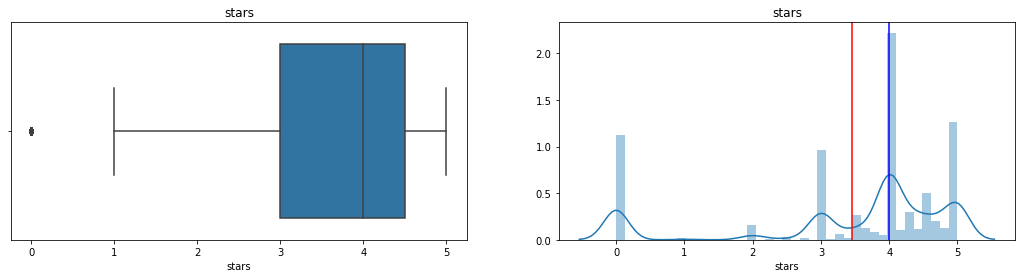

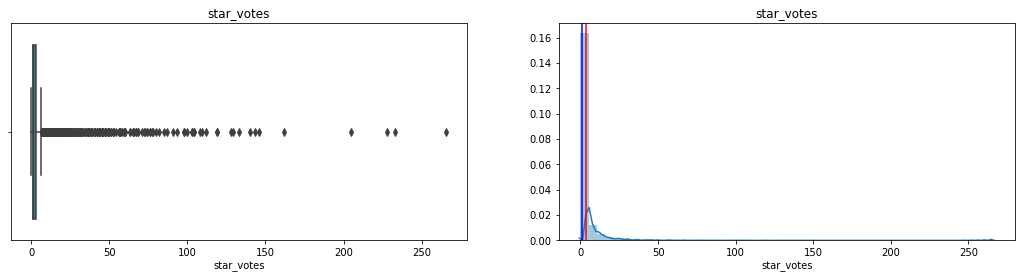

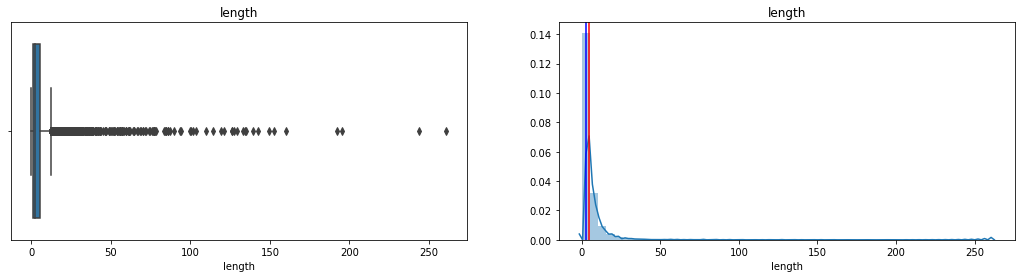

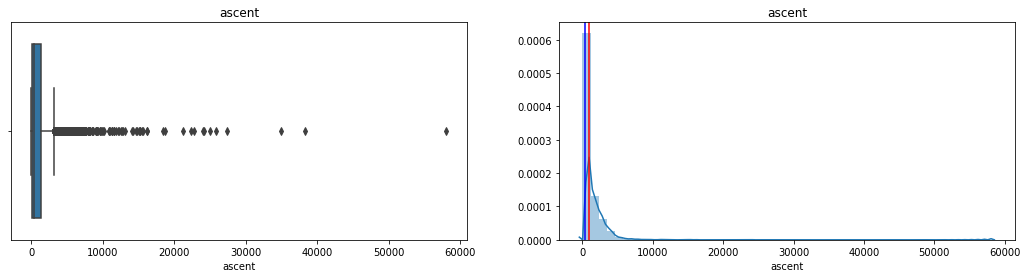

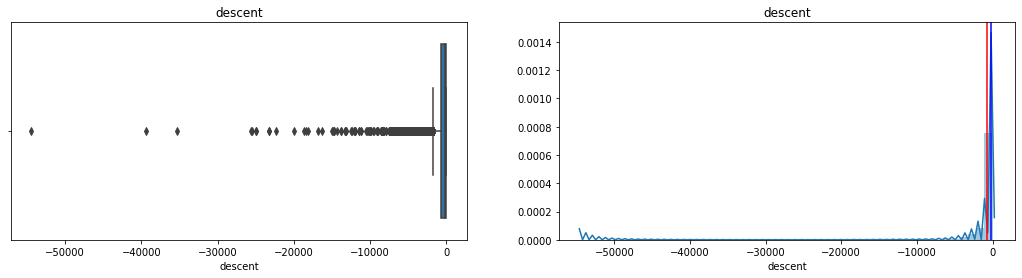

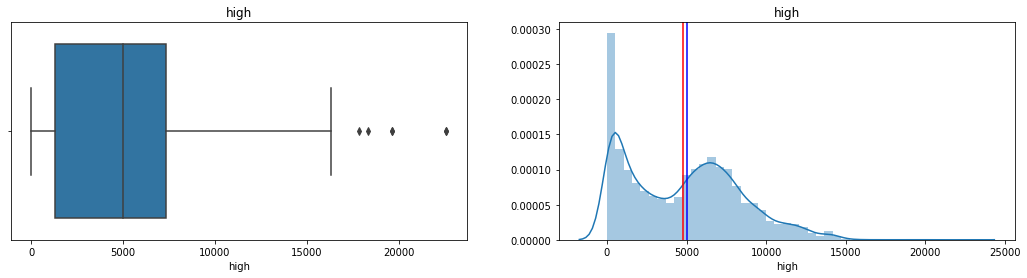

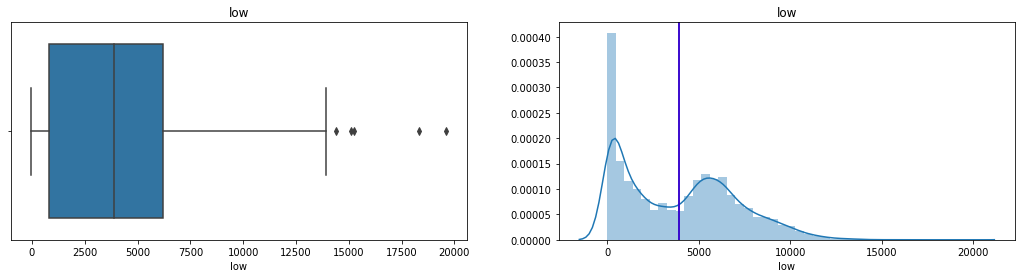

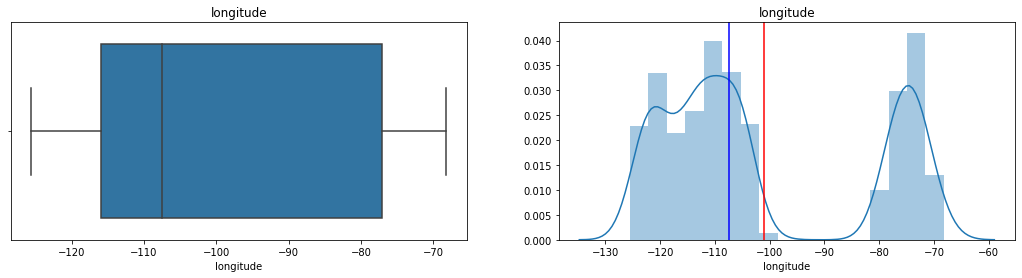

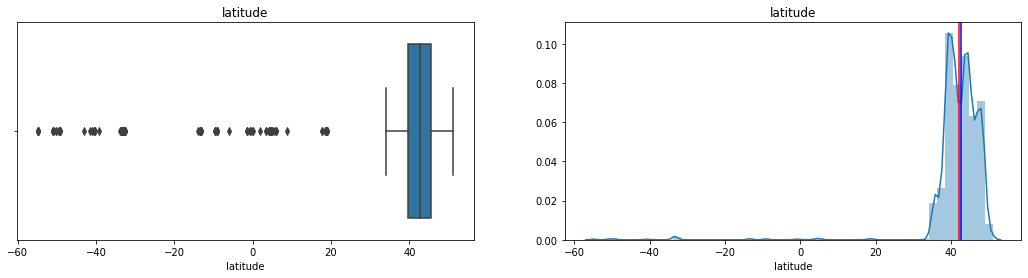

In [7]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.loc[:, ~df.columns.isin(numeric_df.columns)]

for column in numeric_df.columns:
    if column != 'id':
        plt.figure(figsize=(18, 4))
        
        plt.subplot(1, 2, 1)
        sns.boxplot(df[column])
        plt.title('{}'.format(column))
        
        plt.subplot(1, 2, 2)
        sns.distplot(df[column])
        plt.axvline(df[column].mean(), color='red')
        plt.axvline(df[column].median(), color='blue')
        plt.title('{}'.format(column))
        
        plt.show()

In [8]:
for column in numeric_df:
    print('{} : {}'.format(column, df[column].nunique()))

id : 11870
stars : 34
star_votes : 97
length : 426
ascent : 3205
descent : 2606
high : 6970
low : 6349
longitude : 10874
latitude : 10554


In [9]:
for column in cat_df.columns:
    print('{}: {}'.format(column, df[column].nunique()))

name: 11874
summary: 8669
difficulty: 7
location: 1879
url: 1
cond_status: 4
cond_date: 1525
city: 1759
state: 43


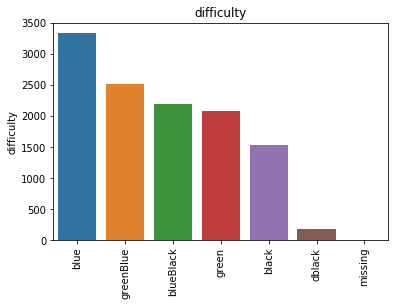

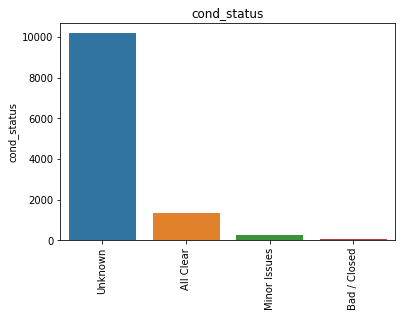

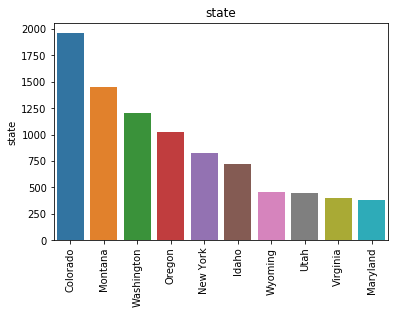

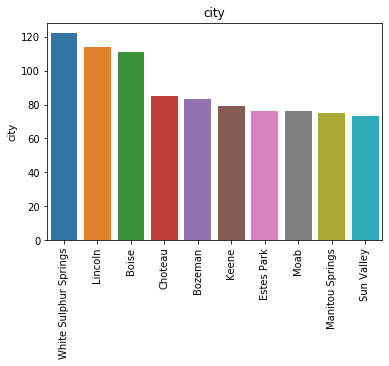

In [10]:
cat = ['difficulty', 'cond_status', 'state', 'city']

for column in cat:
    names = list(df[column].value_counts().index[:10])
    value = df[column].value_counts()[:10]
    plt.title('{}'.format(column))
    sns.barplot(names, value)
    plt.xticks(rotation='vertical')
    plt.show()

Well, we know that our difficulty category is ranked, so let's make a new feature for the difficulty.

In [11]:
df.difficulty.value_counts()

blue         3336
greenBlue    2522
blueBlack    2205
green        2092
black        1530
dblack        176
missing        13
Name: difficulty, dtype: int64

In [12]:
difficulties = ['green', 'greenBlue', 'blue', 'blueBlack', 'black', 'dblack']

#our function returns the index (from 0 - 5) or null
def convert_difficulty(value):
    if value in difficulties:
        return difficulties.index(value)
    else:
        return np.nan

df['diff_ranked'] = df['difficulty'].apply(lambda x: convert_difficulty(x))

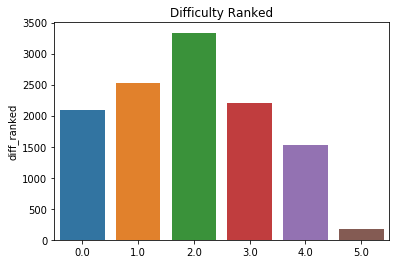

In [13]:
names = df.diff_ranked.value_counts().sort_index().index
values = df.diff_ranked.value_counts().sort_index()

sns.barplot(names, values)
plt.title('Difficulty Ranked')
plt.show()

# Summary EDA

In [14]:
df['summary'][:10]

0                 A favorite loop in the Springs area.
1    A fun, rolling trail with a sense of seclusion...
2    A longer loop in this spectacular area allows ...
3    A truly beautiful hike following Ice Cave Cree...
4    Easily accessible from Colorado Spings, with v...
5    An excellent, but short, loop through the hear...
6    A hike with creeks, bridges, scree slopes, for...
7    A solid ascent along the ridge northwest of th...
8    Widely recognized as one of the best urban tra...
9    This 750 acre park features geological formati...
Name: summary, dtype: object

In [15]:
summary_length = []

for i in range(len(df['summary'])):
    summary_length.append(len(df['summary'][i]))
    
print('Our df is {} long and we have {} summary lengths.'.format(len(df), len(summary_length)))
print('The average is {} and the median is {} --- std {}'.format(np.mean(summary_length), np.median(summary_length), np.std(summary_length)))

Our df is 11874 long and we have 11874 summary lengths.
The average is 57.374094660603 and the median is 60.0 --- std 33.48130321199061


In [16]:
df['summary_length'] = df['summary'].apply(lambda x: len(x))

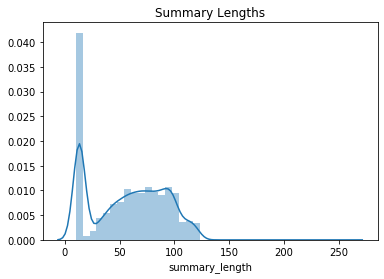

In [17]:
sns.distplot(df['summary_length'])
plt.title('Summary Lengths')
plt.show()

In [18]:
for i in range(int(len(df['summary']) / 50)):
    if len(df['summary'][i]) == 13:
        print(df['summary'][i])

To be written
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary
Needs Summary


In [19]:
df['summary'] = df['summary'].str.lower()
needs_summary = df.loc[df.summary.str.contains('summary')]
needs_summary.summary.value_counts()

needs summary                                 2698
needs summary and description.                  30
this trail could use a short summary!           14
needs summary.                                   6
this trail needs a summary!                      2
this trail could use a summary!                  1
needs summary and an expanded description.       1
summary here.                                    1
this trail needs a summary                       1
needs summary!                                   1
Name: summary, dtype: int64

In [20]:
small_summaries = df.loc[df.summary_length <= 20]

small_summaries.summary.value_counts()[:10]

needs summary        2698
needs adoption        347
needs adoption!        26
coming soon            11
adopt me, please!       9
adopt this trail!       8
to be written           7
needs summary.          6
needs adoption.         6
to be completed         2
Name: summary, dtype: int64

In [21]:
needs_adoption = df.loc[df.summary.str.contains('adopt')]
needs_adoption.summary.value_counts()

needs adoption       347
needs adoption!       26
adopt me, please!      9
adopt this trail!      8
needs adoption.        6
adopt me please!       1
Name: summary, dtype: int64

In [22]:
df['summary'] = df['summary'].apply(lambda x: np.nan if 'summary' in x or 'adopt' in x else x)

0                     a favorite loop in the springs area.
1        a fun, rolling trail with a sense of seclusion...
2        a longer loop in this spectacular area allows ...
3        a truly beautiful hike following ice cave cree...
4        easily accessible from colorado spings, with v...
                               ...                        
11869    hike through fields of wildflowers and along a...
11870    h island is located in the beagle channel and ...
11871    a day trip to martial glacier for the best vie...
11872    laguna del caminante to ushuaia via cañadon de...
11873    this short easy trail leads to a cascade viewp...
Name: summary, Length: 11874, dtype: object

In [24]:
df = df.dropna().reset_index(drop=True)

Let's start building our first content similarity model.

In [25]:
import re

def text_cleaner(text):
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text

df['sent_combined'] = df['summary'] + ' ' + df['difficulty']
df['sent_combined'] = df['sent_combined'].apply(lambda x: text_cleaner(x))

## Filter Combined with Get Request

Found this Lat/Long dataframe [here](https://simplemaps.com/data/us-cities).

In [55]:
cities_df = pd.read_csv('uscities.csv')

In [56]:
#drop some unnecessary columns
cities_df = cities_df.drop(columns=['city', 'county_fips_all', 'population', 'density', 'source', 'military', 'incorporated', 'timezone', 'zips', 'id'])

In [57]:
#make needed lists searchable
lower_list = ['city_ascii', 'state_name']

for column in lower_list:
    cities_df[column] = cities_df[column].apply(lambda x: x.lower())

#feature we'll use in our function
cities_df['city_state'] = cities_df['city_ascii'] + ' ' + cities_df['state_name']

In [58]:
import requests
import json
from fuzzywuzzy import fuzz 


#items needed for api requests
api_key = '200624046-87b4b60fed1dcef7439e3629d7991921'
url = 'https://www.hikingproject.com/data/'
extension = 'get-trails'

def get_hikes(city, state, max_distance, max_length):
    #find city from cities_df, needed for latitude and longitiude
    city_state = city.lower() + ' ' + state.lower()
    
    matches = []
    for item in cities_df['city_state']:
        matches.append(fuzz.partial_ratio(item, city_state))
        
    index = matches.index(max(matches))
    
    #lat and long needed for parameters
    lat = cities_df['lat'][index]
    long = cities_df['lng'][index]
    
    #make get request for information
    params = {'key' : api_key, 'lat' : lat, 'lon' : long, 'maxDistance' : max_distance, 'maxResults' : 500}
    req = requests.get(url + extension, params=params)
    
    if (req.status_code == 200):
        parsed = json.loads(req.text)
        trails = parsed['trails']
    else:
        print('Bad Request -- Error: {}'.format(req.status_code))
    
    #create new dataframe
    columns = ['name', 'summary', 'difficulty', 'stars', 'location', 'length', 'ascent', 'descent', 'high', 'low']
    matched_df = pd.DataFrame(columns=columns)
    #add each hike as a new row in our matched_df
    for i in range(len(trails)):
        new_row = pd.DataFrame()
        
        for column in columns:
            new_row[column] = [trails[i][column]]
        
        matched_df = matched_df.append(new_row, ignore_index=True)
        matched_df = matched_df.loc[matched_df.length <= max_length]
    
    return matched_df

# Clean our returned dataframe

In [59]:
def df_cleaner(dataframe):
    
    dataframe['summary'] = dataframe['summary'].apply(lambda x: x.lower())
    
    #convert summaries that need a summary to actual null value
    dataframe['summary'] = dataframe['summary'].apply(lambda x: np.nan if 'summary' in x or 'adopt' in x or x == '' else x)
    
    #drop null values
    dataframe = dataframe.dropna().reset_index()
    
    #create our feature we'll use for NLP matching
    dataframe['sent_combined'] = dataframe['summary'] + ' ' + dataframe['difficulty']
    dataframe['sent_combined'] = dataframe['sent_combined'].apply(lambda x: text_cleaner(x))
    #drop our index from before
    dataframe = dataframe.drop(columns='index')
    return dataframe

## Content Based for 'Seasoned' Hikers

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics.pairwise import cosine_similarity


def similar_hikes(data, name):
    #add our named hike to our df
    name_df = df.loc[df.name == name, ['name', 'summary', 'difficulty', 'stars', 'location', 'length', 'ascent', 'descent', 'high', 'low']]
    if len(data.loc[data.name == name]) == 0:
        name_df = df_cleaner(name_df)
        data = data.append(name_df, ignore_index=True)
    
    #vectorizer our sent_combined column
    vectorizer = CountVectorizer(stop_words='english', max_features=50)
    vector = vectorizer.fit_transform(data['sent_combined'])
    columns = vectorizer.get_feature_names()
    
    #create our bag of words and combine with other features from the hike
    bow = pd.DataFrame(vector.toarray(), columns=columns)
    partial_df = data[['stars', 'length', 'ascent', 'descent', 'high', 'low']]
    
    #create our features
    X = pd.concat([bow, partial_df], axis=1)
    
    #cosine_similarity for our features
    cosine_sim = cosine_similarity(X, X)

    # initializing the empty list of recommended hikes
    recommended_hikes = pd.DataFrame(columns = data.columns)
    
    # getting the index of the movie that matches the title
    index = data.loc[data.name == name].index.tolist()

    series = pd.Series(cosine_sim[index[0]]).sort_values(ascending=False)
    
    if len(cosine_sim) >= 11:
        indexes = list(series.index[1: 11])
    else:
        indexes = list(series.index[1: len(cosine_sim)])
    
    
    for i in indexes:
        recommended_hikes = recommended_hikes.append(data.loc[i, :])
        
    return recommended_hikes

In [61]:
test_df = get_hikes('Austin', 'Texas', 150, 10)
test_df = df_cleaner(test_df)
similar_hikes(test_df, df['name'][0])

,name,summary,difficulty,stars,location,length,ascent,descent,high,low,sent_combined
58,Restoration Way,a trail located to the west of the vista loop ...,blueBlack,4.8,"Cross Mountain, Texas",3.0,241,-232,1429,1209,a trail located to the west of the vista loop ...
264,Cedar Creek Loop Trail,"a loop trail that passes through some shade, p...",green,3.0,"Somerville, Texas",1.9,47,-46,282,239,"a loop trail that passes through some shade, p..."
108,Indiangrass Trail,"hike from the hilltop down into open, sprawlin...",greenBlue,4.0,"Bertram, Texas",1.5,205,-208,1307,1125,"hike from the hilltop down into open, sprawlin..."
87,Slaughter Creek Trail,this is an easily accessed multi-use trail tha...,greenBlue,3.7,"Shady Hollow, Texas",5.1,177,-178,1002,857,this is an easily accessed multi-use trail tha...
80,Cottontail Loop,the cottontail loop encompasses all the beauty...,greenBlue,4.3,"Spicewood, Texas",1.3,147,-146,834,692,the cottontail loop encompasses all the beauty...
139,Loop Trail,a trail that circles enchanted rock.,blue,3.6,"Fredericksburg, Texas",4.6,274,-299,1589,1360,a trail that circles enchanted rock. blue
24,Hillview Trail,a flat rock trail with smooth climbs and trees...,blue,4.3,"Shavano Park, Texas",2.8,251,-229,1333,1122,a flat rock trail with smooth climbs and trees...
42,Multi-Use Trail,nice doubletrack multi-use trail with good sig...,greenBlue,5.0,"Briarcliff, Texas",3.9,145,-147,896,796,nice doubletrack multi-use trail with good sig...
125,West Access Trail,this is the toughest trail in this section of ...,blue,4.0,"Morgans Point Resort, Texas",0.6,108,-83,617,513,this is the toughest trail in this section of ...
30,Canyon Trail,the canyon trail is a beautiful scenic switchb...,blue,5.0,"The Hills, Texas",1.0,144,-130,856,763,the canyon trail is a beautiful scenic switchb...


## Cold Start Users - Keyword Matching!

For this, we're going to let users filter their hikes. Then return values based on similarity of a preset list of keywords.

First, we'll need to find out which keywords to use. We'll look at it with a wordlcloud, then with topic extraction.

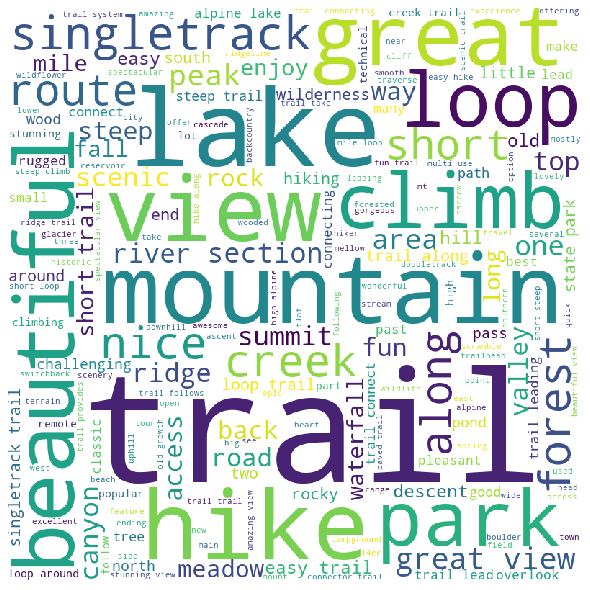

In [30]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.summary: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [290]:
#some keywords based on our wordcloud + intuition
keywords = ['short', 'mountain', 'river', 'forest', 'beautiful', 'challenging', 'water', 'flower', 'easy']

In [154]:
from gensim.summarization.summarizer import summarize

large_combined = ''

for i in range(len(df)):
    sentence = df['summary'][i]
    if i != 0:
        large_combined = large_combined + '. ' + sentence
    else: 
        large_combined = large_combined + sentence

In [158]:
#what 50 word sentences best summarizes our corpus?
summarize(large_combined, word_count=50)

'a short, moderately steep hike up red butte with sandstone slab furniture and great views of the salt lake valley..\na short, rocky climb providing access to a beautiful loop with views and forest..\nthis forested loop up acadia mountain is one of the most popular hikes in the park with great views..'

In [291]:
#let's add a few more words
words = ['steep', 'view', 'breathtaking', 'popular']

for word in words:
    keywords.append(word)

Ok, now that we have our keywords, let's create our recommender model!

First, we'll want to make a new feature that performs some NLP on our data.

## Recommender with keyword matching

In [62]:
import gensim.downloader as api
import spacy

word_vectors = api.load("glove-wiki-gigaword-100")
nlp = spacy.load('en_core_web_sm')

In [63]:
def perform_nlp(nlp_data):
    sentences = []
    #first do some NLP on each sentence as a list
    for sentence in nlp_data['summary']:
        sentence = nlp(sentence)
        sentence = [
            token.lemma_.lower()
            for token in sentence
            if not token.is_stop
            and not token.is_punct
        ]
        sentences.append(sentence)
    
    #add list of NLP words to our df    
    nlp_data['nlp_summary'] = sentences
    
    return nlp_data

In [64]:
def keyword_hikes(keyword_df, keywords):
    #final score to sort by
    averages = []
    
    
    for i in range(len(keyword_df)):
        #make sure each word in nlp_summary is in our word_vector
        sentence = []
        for word in keyword_df['nlp_summary'][i]:
            if word in word_vectors.vocab.keys():
                sentence.append(word)
                
        #score each keyword with our word_vector
        scores = []
        for keyword in keywords:
            scores.append(word_vectors.n_similarity(sentence, keyword))
        
        #average both keywords
        averages.append(np.mean(scores))
    
    keyword_df['average_scores'] = averages
    
    keyword_df = keyword_df.sort_values(by='average_scores', ascending=False)
    
    return keyword_df[:10][['name', 'summary', 'difficulty', 'stars', 'location', 'length', 'ascent', 'descent', 'high', 'low']]
            

In [66]:
test_df = get_hikes('Austin', 'Texas', 150, 10)
test_df = df_cleaner(test_df)
test_df = perform_nlp(test_df)
keyword_hikes(test_df, ['breathtaking', 'water'])

,name,summary,difficulty,stars,location,length,ascent,descent,high,low
235,Caroline's Loop,"a fun, semi-technical extension to the joe joh...",blue,2.8,"Helotes, Texas",2.5,232,-169,1365,1140
65,Violet Crown Trail,a gem in the heart of austin that is on its wa...,blue,4.1,"Rollingwood, Texas",5.4,149,-387,695,453
20,Homestead Trail Loop,a super-popular loop on a multi-use trail rich...,greenBlue,3.0,"Austin, Texas",3.4,156,-156,587,489
167,Yaupon Trail,lots of steps on the south end reward you with...,blue,3.5,"West Lake Hills, Texas",0.6,69,-96,797,702
315,Prairie Trail,a short trail that passes through open prairie...,green,2.0,"Rosharon, Texas",1.3,4,-8,66,60
42,Multi-Use Trail,nice doubletrack multi-use trail with good sig...,greenBlue,5.0,"Briarcliff, Texas",3.9,145,-147,896,796
283,Lefty,multi-use trail cutting across pace bend park ...,green,3.0,"Lago Vista, Texas",0.6,93,-14,791,712
36,Serene Loop Trail,this is a great short loop with easy grades th...,blue,5.0,"The Hills, Texas",0.5,19,-23,901,882
59,Barton Creek Greenbelt Trail,an austin icon when it comes to inner city gre...,blue,4.1,"Rollingwood, Texas",3.4,304,-20,853,555
96,Savanna Loop Trail,this is the longer loop option on the west sid...,greenBlue,4.0,"Castle Hills, Texas",1.8,106,-103,933,858


# Evaluating our Recommenders

In [142]:
#only use certain columns
columns = ['name', 'summary', 'difficulty', 'stars', 'location', 'length', 'ascent', 'descent', 'high', 'low']

#our target df
target_hike_name = df['name'][0]
target_df = df.loc[df.name == target_hike_name][columns]
target_df = df_cleaner(target_df)

all_hikes = df_cleaner(get_hikes('Austin', 'Texas', 150, 10))

#our ten recommendations                       
recommended_df = similar_hikes(all_hikes, target_hike_name)

#the rest of all hikes that didn't match
no_match = all_hikes.loc[~all_hikes.name.isin(recommended_df.name)]

combined_df = pd.concat([target_df, recommended_df, no_match]).reset_index(drop=True)

In [143]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)
vector = vectorizer.fit_transform(combined_df['sent_combined'])
vec_col = vectorizer.get_feature_names()

bow = pd.DataFrame(vector.toarray(), columns=vec_col)

combined_df = pd.concat([combined_df, bow], axis=1)

combined_df = combined_df.drop(columns=['name', 'summary', 'sent_combined', 'difficulty', 'location'])

In [147]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

normalize = Normalizer()
svd = TruncatedSVD()

reduce = make_pipeline(normalize, svd)

combined_svd = reduce.fit_transform(combined_df)

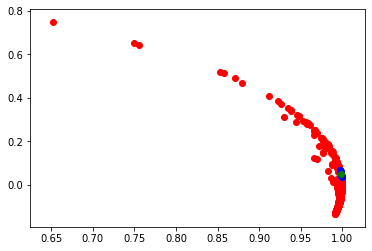

In [149]:
plt.scatter(combined_svd[12:, 0], combined_svd[12:, 1], color='red')
plt.scatter(combined_svd[1:11, 0], combined_svd[1:11, 1], color='blue')
plt.scatter(combined_svd[0, 0], combined_svd[0, 1], color='green')
plt.show()